#Data and Databases
##Networks

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 8) 


for a fine tutorial, from which I'm showing slides, see 
http://www.scottbot.net/HIAL/?page_id=41142


##How to represent networks with numbers


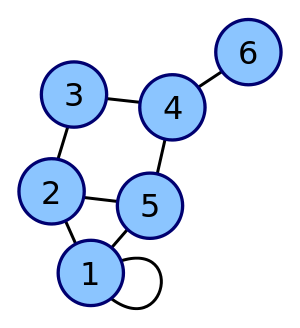

In [2]:
Image("https://upload.wikimedia.org/wikipedia/commons/thumb/2/28/6n-graph2.svg/300px-6n-graph2.svg.png")
###h/t wikipedia

##A long way

1 IS CONNECTED TO 1

1 IS CONNECTED TO 2

1 IS CONNECTED TO 5

2 IS CONNECTED IS 1

. . . .

##adjacency matrix
$\begin{pmatrix}
1 & 1 & 0 & 0 & 1 & 0\\
1 & 0 & 1 & 0 & 1 & 0\\
0 & 1 & 0 & 1 & 0 & 0\\
0 & 0 & 1 & 0 & 1 & 1\\
1 & 1 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0\\
\end{pmatrix}$

A $1$ at column $i$ and row $j$ means that $i$ and $j$ are connected. 

$6$ is connected only to $4$; $1$ is connected to itself, $2$, and $5$.

This graph is *symmetric*: it assumes a connection from $1$ to $2$ is the same as one from $2$ to $1$. 

Often this is **not** the case: think of friending someone on a social network: A friending B does not mean B friends A. Such a graph is called a *directed* graph. 





Create a matrix capturing some of the relationships described in Peter Gabriels' *Games without Frontiers* (1980):


    Jeux sans frontières (4x)

    Hans plays with Lotte
    Lotte plays with Jane
    Jane plays with Willi
    Willi is happy again
    Suki plays with Leo
    Sacha plays with Britt
    Adolf builds a bonfire
    Enrico plays with it

`source: http://petergabriel.com/video/peter-gabriel-games-without-frontiers/`

Assume "plays with" is non-directed, so "plays with" could be "plays together."


#An example: membership in patriotic clubs

I'm taking this example from http://kieranhealy.org/blog/archives/2013/06/09/using-metadata-to-find-paul-revere/ and moving it from `R` to `python`

In [3]:
membership_matrix=pd.read_csv("https://raw.githubusercontent.com/kjhealy/revere/master/data/PaulRevereAppD.csv", index_col=[0])

We have a matrix of 254 rows and 7 columns

##discerning connections!

We are intested in 

- who is connected to whom

- which organization most connected to which other organization.

Our quarry is something like the *similarity matrices* we looked at in doing our work with text.

We are going to create an *adjacency matrix*, another square matrix that indicates who is connected to whom.

###a little more matrix math
(You are not responsible for this but I want you to know the smoke and mirrors.)

We have to do a little of basic arithmetic with matrices to make this work.

First we need to recall the idea of the transpose, which is just flipping the rows and columns of a matrix.

$\begin{bmatrix}
1 & 2  \\
3 & 4 \end{bmatrix}^{\mathrm{T}}
=
\begin{bmatrix}
1 & 3  \\
2 & 4 \end{bmatrix}$

The *adjacency* matrix is the product of a matrix and its transpose.

Say we have a $257 * 7$ matrix; its transpose will be $7 * 257$ matrix.

If we multiply an $M * N$ matrix by an $N * M$ matrix, we get a $M * M$ matrix.


So let's start with the adjacency of every *person* to every other person.

Our goal, then, is a symmetrical matrix that matches $M$ people to $M$ people.

In python we can use the `.dot` method to perform the necessary form of matrix multiplication. We can do this directly on `pandas` dataframes.

Just as easily we can get the adjacency among the clubs.

This time we multipy the transpose by the original matrix.

(Remember: matrix multiplication is **not** commutative.)

#Python package for networks: `networkx`


Installed by default in condas
If problem, run in shell

`conda install networkx`

In [4]:
import networkx as nx

introduces new data type, the graph, with lots of operations to create, modify, analyze, graph, import and export graphs

find the full documentation at 
https://networkx.github.io/


Begin by initializing a graph, then add edges, nodes or both.


In [5]:
my_first_graph = nx.Graph()

In [6]:
my_first_graph.add_edge(1,2)

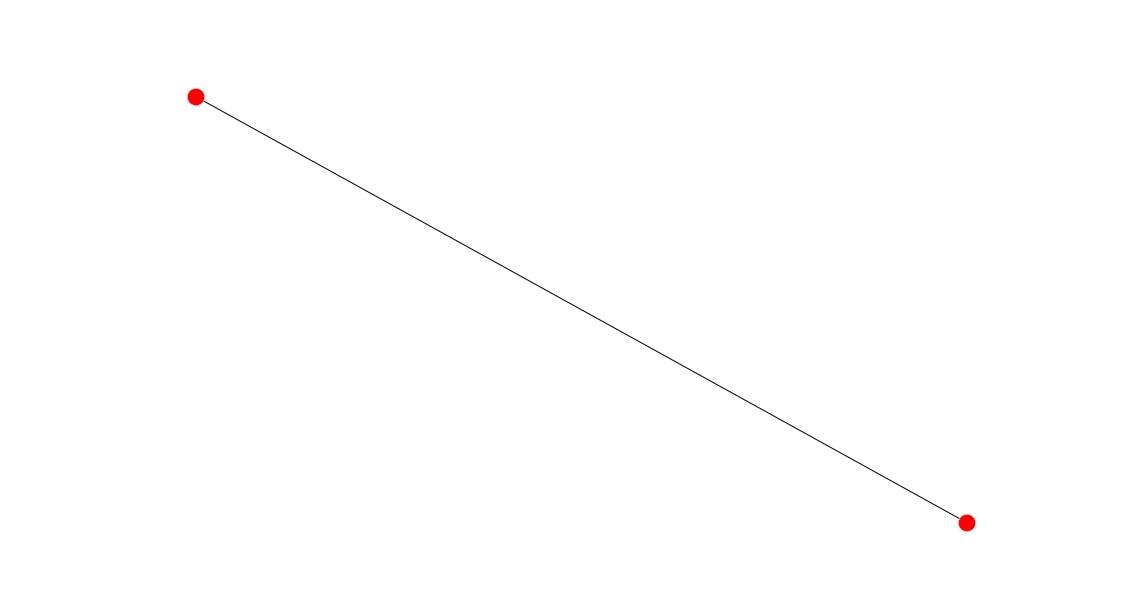

In [7]:
nx.draw(my_first_graph)

In [8]:
nx.number_of_nodes(my_first_graph)

2

### Both nodes and edges can have additional attributes

most important for us is "weight": how *strong* a connection between two nodes


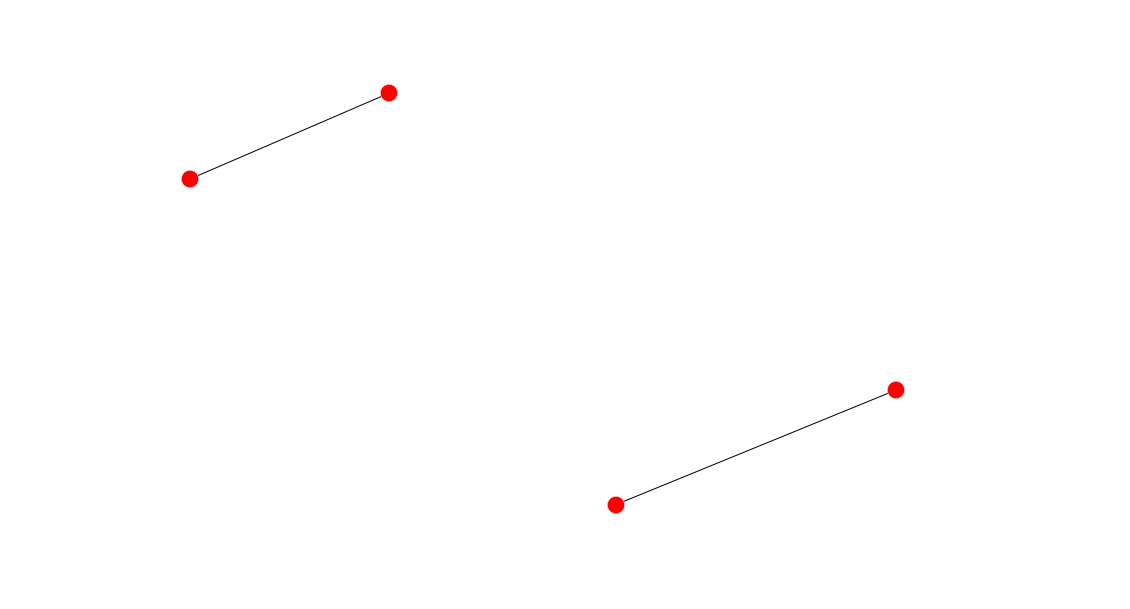

In [11]:
my_first_graph.add_edge(4,5,weight = 3)
nx.draw(my_first_graph)

Default simply graphing method *not* show the weighted edge.

We will fix this.

For examples of drawing in `networkx`, see https://networkx.github.io/documentation/latest/gallery.html

We can get far finer control by building up out graph `matplotlib` style.
Just instruct it to plot each element: edges, nodes, and labels.

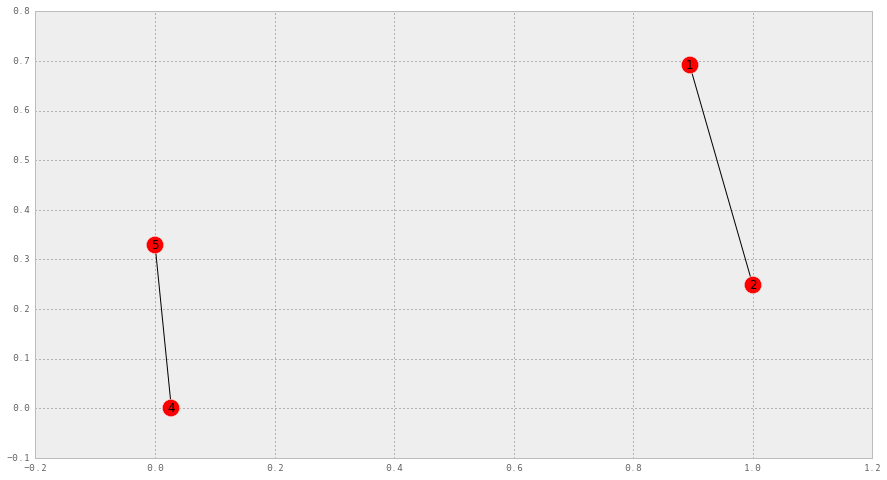

In [12]:
pos=nx.spring_layout(my_first_graph,iterations=20)
nx.draw_networkx_edges(my_first_graph, pos)
nx.draw_networkx_nodes(my_first_graph, pos)
nx.draw_networkx_labels(my_first_graph, pos)
plt.show()

Don't want those ugly axes!

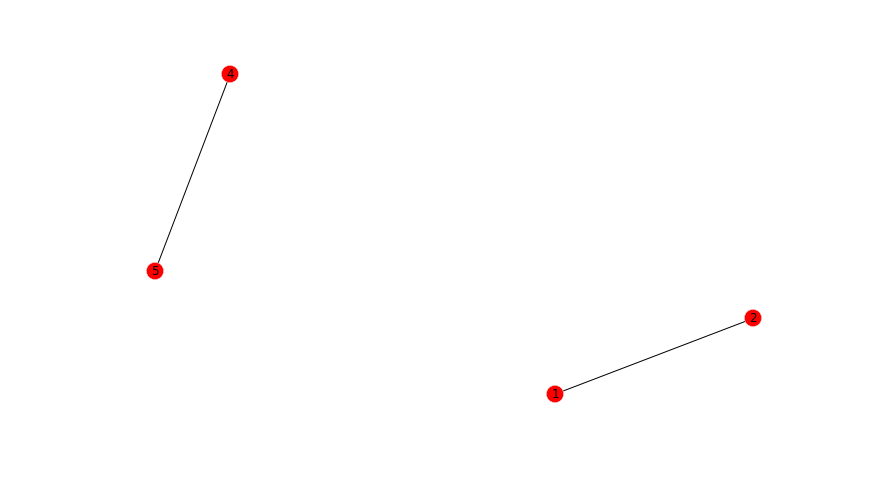

In [13]:
pos=nx.spring_layout(my_first_graph,iterations=20)
nx.draw_networkx_edges(my_first_graph, pos)
nx.draw_networkx_nodes(my_first_graph, pos)
nx.draw_networkx_labels(my_first_graph, pos)
plt.axis("off")
plt.show()

Note that the algorithm drawing the graphs is *non*-deterministic. It won't look the same from time to time.

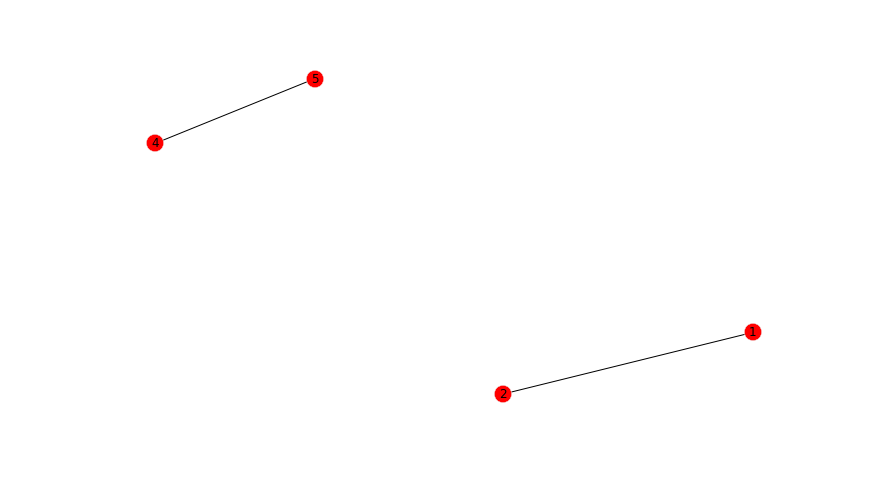

In [14]:
pos=nx.spring_layout(my_first_graph,iterations=20)
nx.draw_networkx_edges(my_first_graph, pos)
nx.draw_networkx_nodes(my_first_graph, pos)
nx.draw_networkx_labels(my_first_graph, pos)
plt.axis("off")
plt.show()

`Networkx` is *not* the best place to do sophisticated graphing.

In order to draw weighted edges differently, we need to add each kind of edge separately.
To do so, we have to cycle through all the edges and pick out the ones that should be bigger.

The edges method will provide a list of all our edges.

only one has a weight!

In [15]:
pos=nx.spring_layout(my_first_graph,iterations=20)
nx.draw_networkx_edges(my_first_graph,pos,edgelist=large_edges,
                    width=6)
nx.draw_networkx_edges(my_first_graph,pos,edgelist=small_edges,
                    width=2)
nx.draw_networkx_nodes(my_first_graph, pos)
nx.draw_networkx_labels(my_first_graph, pos)
plt.axis("off")
plt.show()

NameError: name 'large_edges' is not defined

###Patriotic Club Example

Let's now return to our example.


In [ ]:
club

`networkx` includes a translation function from adjacency matrices to graphs `from_numpy_matrix()`. There's also one for sparse matrices.

But we've lost the names of our clubs here.

We can put them back by providing a mapping from node numbers to names as a dictionary.

In [ ]:
pos=nx.spring_layout(club_adjacency_graph,iterations=20)
nx.draw_networkx_edges(club_adjacency_graph, pos)
nx.draw_networkx_nodes(club_adjacency_graph, pos)
nx.draw_networkx_labels(club_adjacency_graph, pos)
plt.axis("off")
plt.show()

Now let's do it with our adjacency matrix for the club members.

*UN*intelligible!

In [ ]:
pos=nx.spring_layout(person_adjacency_graph, iterations=30)
plt.figure(figsize=(40,40))
nx.draw_networkx_edges(person_adjacency_graph, pos, width=.02)
nx.draw_networkx_nodes(person_adjacency_graph, pos, node_size=50)
nx.draw_networkx_labels(person_adjacency_graph, pos)
plt.axis('off')
plt.show()

##Graphing the prelude to analysis, not the thing itself

##Just as term-document matrices are the fundamental form for undertaking *text analysis*, putting data into a graph form, as in `networkx`, allows a wide range of analysis, including sophisticated *supervised* and *unsupervised* learning.

`Google`'s `Page-Rank`--the core of its search algorithm--is a graph analysis algorithm.

Intuition is that websites (nodes) referred to by other high-ranking websites (nodes) should be more highly ranked


##Black box time!


###lots of centrality measures, most built into `networkx`

We'll use a fairly sophisticated one, eigenvector centrality, built into `networks`. 

If you want to unblackbox, you're ready for a more advanced course!



In [ ]:
person_adjacency_graph_centrality=nx.eigenvector_centrality(person_adjacency_graph, max_iter=30)

In [ ]:
person_adjacency_graph_centrality

argh, need to sort that

In [ ]:
sorted(person_adjacency_graph_centrality, key=person_adjacency_graph_centrality.get, reverse=True)[:10]  #useful syntax to know for sorting dictionaries!

In [ ]:
for name in sorted(person_adjacency_graph_centrality, key=person_adjacency_graph_centrality.get, reverse=True)[0:10]:
    print(name, person_adjacency_graph_centrality[name])

##Revere is our terrorist mastermind!
###Get them on a do-not fly, er, ride list!

Point *isn't* that such techniques are *always* right:

- they *do* uncover relationship

- they have *tons* of false positives

##Speaking of the NSA

###Linked-in Mining

Transparency Toolkit
https://transparencytoolkit.org/project/icwatch/

slurp up 27k linked-in profiles for US intelligence agency current or former personel


In [ ]:
import requests

In [ ]:
r=requests.get('https://raw.githubusercontent.com/TransparencyToolkit/ICWATCH-Data/master/data/original_run/xkeyscore.json')

#Exporting

Networkx and python good at the manipulation of things into network form, but clunky on visualization and some analysis.

Easy to export in numerous formats, such as json, which is good for use in D3.

In [ ]:
import json
from networkx.readwrite import json_graph


Json needs the graph to be converted into a "node-link" format, which comprises

- ordered list of names
- list of edges and weights by numbers corresponding to those names

Helper function saves you the trouble of making it.


In [ ]:
club_adjacency_graph_node_link = json_graph.node_link_data(club_adjacency_graph)

In [ ]:
json.dump(club_adjacency_graph_node_link, open('revere_adjacency.json','w'))

In [ ]:
!head revere_adjacency.json

##now you can use this in D3.js (example!)

Much social network analysis software needs the graphml format.

it's as easy as

    nx.write_graphml(G,'so.graphml')
    
    
You can import this into the powerful open-source package `gephi`. http://gephi.org/

#Performativity of networks

##Networks a powerful metaphor for undestanding the social and natural world
##But not natural themselves

Performative claim:
    
    "Network metaphors and methods are being built in to social practices in ways that at once provide
    new, theoretically-informed tools for social actors, and notionally “raw”
    data for social network analysts"

Kieran Healy (Duke),     
    http://kieranhealy.org/files/papers/performativity.pdf
        